In [3]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [4]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [5]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [6]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [7]:
pred = tf.add(tf.mul(X, W), b)

In [8]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
init = tf.global_variables_initializer()

Epoch:    50 cost= 0.077066943 W= 0.244947 b= 0.834897
Epoch:   100 cost= 0.077058546 W= 0.245223 b= 0.832908
Epoch:   150 cost= 0.077051073 W= 0.245483 b= 0.831037
Epoch:   200 cost= 0.077044457 W= 0.245728 b= 0.829278
Epoch:   250 cost= 0.077038579 W= 0.245958 b= 0.827624
Epoch:   300 cost= 0.077033363 W= 0.246174 b= 0.826067
Epoch:   350 cost= 0.077028722 W= 0.246378 b= 0.824603
Epoch:   400 cost= 0.077024624 W= 0.246569 b= 0.823226
Epoch:   450 cost= 0.077020958 W= 0.246749 b= 0.821932
Epoch:   500 cost= 0.077017717 W= 0.246918 b= 0.820715
Epoch:   550 cost= 0.077014811 W= 0.247077 b= 0.819569
Epoch:   600 cost= 0.077012248 W= 0.247227 b= 0.818491
Epoch:   650 cost= 0.077009954 W= 0.247368 b= 0.817477
Epoch:   700 cost= 0.077007942 W= 0.2475 b= 0.816525
Epoch:   750 cost= 0.077006139 W= 0.247625 b= 0.815629
Epoch:   800 cost= 0.077004515 W= 0.247742 b= 0.814787
Epoch:   850 cost= 0.077003099 W= 0.247852 b= 0.813994
Epoch:   900 cost= 0.077001810 W= 0.247956 b= 0.813247
Epoch:   950

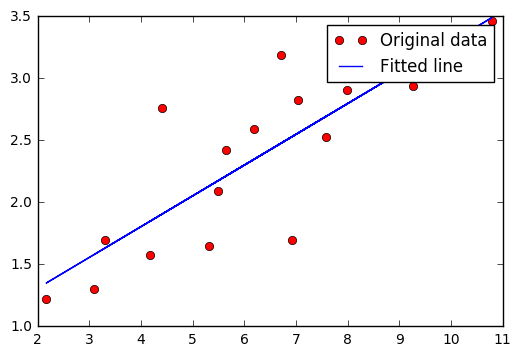

In [16]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for(x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        if(epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch: ", "%4d" % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)
    
    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()